In [1]:
import os
print(os.listdir("/Users/zijunning/Documents/EECS_351"))

['.DS_Store', 'data_32', 'data_256', 'README.md', '.gitignore', '351.ipynb', '.ipynb_checkpoints', '.git']


In [2]:
# check if files can be opened
from os import walk
for (dirpath, dirnames, filenames) in walk("/Users/zijunning/Documents/EECS_351/data_256"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)

Directory path:  /Users/zijunning/Documents/EECS_351/data_256
Folder name:  ['art_pictures', '.ipynb_checkpoints']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures
Folder name:  ['test', 'train']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test
Folder name:  ['expressionism', 'art_nouveau', 'renaissance', 'ukiyo_e', 'realism', 'romanticism', 'surrealism', 'impressionism', 'baroque', 'post_impressionism']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/expressionism
Folder name:  []
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/art_nouveau
Folder name:  ['.ipynb_checkpoints']
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/art_nouveau/.ipynb_checkpoints
Folder name:  []
Directory path:  /Users/zijunning/Documents/EECS_351/data_256/art_pictures/test/renaissance
Folder name:  []
Directory path:  /Users/zijunning/Documents/EECS_351/data_

In [3]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = datasets.ImageFolder("/Users/zijunning/Documents/EECS_351/data_256/art_pictures/train",
                               transform=transform)

In [5]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [6]:
# Looping through it, get a batch on each loop 
for images, labels in dataloader:
    pass

In [20]:
labels_map = {
    0: "art_nouveau",
    1: "baroque",
    2: "expressionism",
    3: "impressionism",
    4: "post_impressionism",
    5: "realism",
    6: "renaissance",
    7: "romanticism",
    8: "surrealism",
    9: "ukiyo_e",
}

In [15]:
# Get one batch
images, labels = next(iter(dataloader))

In [7]:
images[1].size()

torch.Size([3, 256, 256])

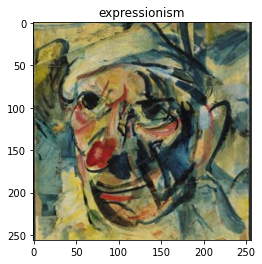

In [32]:
# see some pictures
some_index = 10
plt.title(labels_map[labels[some_index].item()])
plt.imshow(images[some_index].permute(1,2,0))

In [10]:
# from torch.nn import Module
# from torch.nn import Conv2d
# from torch.nn import Linear
# from torch.nn import MaxPool2d
# from torch.nn import ReLU
# from torch.nn import LogSoftmax
# from torch import flatten
import torch.nn as nn
import torch.nn.functional as F

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x59536 and 400x120)